Moving Averge Method
MAPE : 0.14114561084079616 ME : -0.12453183520599262 MAE : 5.796816479400749 RMSE : 7.242330118152365


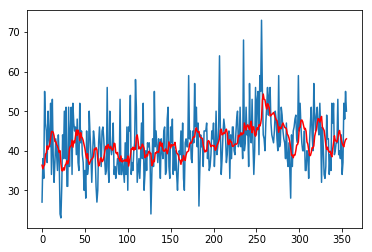

Single Exponential Method
MAPE : 0.145967014705052 ME : -0.09954965504183189 MAE : 5.999246665741553 RMSE : 7.48058983618224


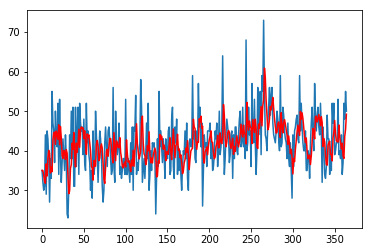

Double Exponential Method
MAPE : 0.0613773320400511 ME : 0.023649581070345357 MAE : 2.506384460038338 RMSE : 3.081471038959605


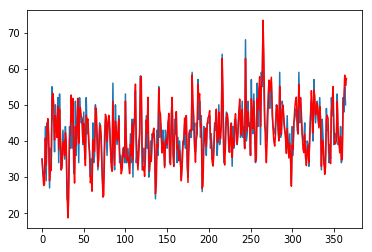

Triple Exponential Method
MAPE : 0.04585691789560022 ME : 0.04027563906218409 MAE : 1.872279931930349 RMSE : 2.313749710292178


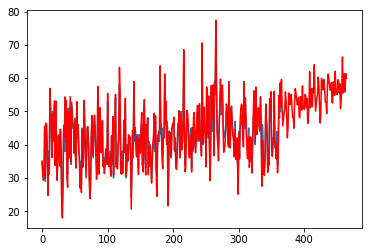

In [2]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import pandas as pd
import numpy as np
import math
data = read_csv('/Users/dheem/Downloads/Jupyter/daily-total-female-births.csv', header=0, index_col=0)
X = data.values

def forecast_accuracy(forecast, actual):
    diff=[]
    for i in range(0,min(len(forecast),len(actual))):
        diff.append(forecast[i] - actual[i])
    mape = np.mean(np.abs(diff)/np.abs(actual))  # MAPE
    me = np.mean(diff)             # ME
    mae = np.mean(np.abs(diff))    # MAE
    rmse = np.mean([(diff[i])**2 for i in range(0,len(diff))])**.5  # RMSE
    print('MAPE :',mape,'ME :',me, 'MAE :',mae,'RMSE :',rmse)

def MAM(X,window):
    history = [X[i] for i in range(window)] #Initially observed only 3 values
    test = [X[i] for i in range(window, len(X))] #WE can't predict X[2] as there is not enough data
    predictions = []
    for t in range(len(test)):
        length = len(history)
        yhat = mean([history[i] for i in range(length-window,length)])
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        #print(predictions[t],history[t])
    print("Moving Averge Method")
    forecast_accuracy(predictions,test)
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()
    
def ES(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n-1] + (1 - alpha) * result[n-1])
    print("Single Exponential Method")
    forecast_accuracy(result,series)
    pyplot.plot(series)
    pyplot.plot(result, color='red')
    pyplot.show()

def DES(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # we are forecasting
          val = result[-1]
        else:
          val = series[n]
        last_level, level = level, alpha*val + (1-alpha)*result[n-1]
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    print("Double Exponential Method")
    forecast_accuracy(result,series)
    pyplot.plot(series)
    pyplot.plot(result, color='red')
    pyplot.show()
    
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def TES(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    print("Triple Exponential Method")
    forecast_accuracy(result,series)
    pyplot.plot(series)
    pyplot.plot(result, color='red')
    pyplot.show()

MAM(X,9)
ES(X,0.4)
DES(X,0.6,0.5)
TES(X,50,0.6,0.5,0.7,100)